In [19]:
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #default stride = 1
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #default pool_size selected
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # adesso voglio distruggere la dimensionalità e usare una FNN
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Keras trasforma 1600 to 10 in automatico, in molti casi invece è da fare per conto nostro
model.summary()

# Param terza riga 3x3xdepth channel 32, 64 da aggiungere che sono i bayas da aggiungere
# 5 riga abbiamo 1600 valori perchè è stato trasformato i valori dei 64 filtri in un array singolo
# ultima riga 1600*10 di prima più i 10 bayes
# None va a rappresentare il batch size

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Cercare di prendere best result from il cambio dei parametri prima non batch e epoch
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# history per salvarlo e poi andarlo a plottare
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7502 - loss: 0.8371 - val_accuracy: 0.9718 - val_loss: 0.1011
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9609 - loss: 0.1299 - val_accuracy: 0.9810 - val_loss: 0.0683
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9719 - loss: 0.0931 - val_accuracy: 0.9845 - val_loss: 0.0552
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9765 - loss: 0.0771 - val_accuracy: 0.9858 - val_loss: 0.0502
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9792 - loss: 0.0679 - val_accuracy: 0.9871 - val_loss: 0.0446
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.9881 - val_loss: 0.0411
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0560 - val_accuracy: 0.9882 - val_loss: 0.0385
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9844 - loss: 0.0474 - val_accuracy: 0.

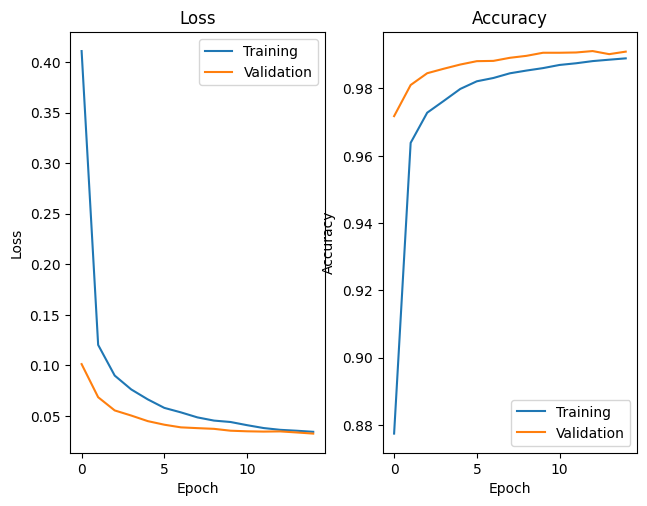

In [22]:
def plot_performance(history):
  fig, ax = plt.subplots(1, 2)
  # Plot training & validation accuracy values
  fig.tight_layout()
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  val_acc = history.history['val_accuracy']
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')
  ax[0].plot(train_loss, label='Training')
  ax[0].plot(val_loss, label='Validation')
  ax[0].legend()
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy')
  ax[1].plot(train_acc, label='Training')
  ax[1].plot(val_acc, label='Validation')
  ax[1].legend()
  plt.show()

plot_performance(history)
# learning rate potrebbe essere buono ma un po' grosso che fa a zig zag
# secondo plot per capire se siamo in overfitting o no

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# minor numero di parametri: max_pooling con size 28,28 to 1x1 e poi lo mettiamo nel fully connected layer e che si
# collegeranno a 10 classi, 10 pesi e e 10 bias

Test loss: 0.02589333802461624
Test accuracy: 0.9911999702453613


In [24]:
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # quanto è bright il pixel, averagePooling da l'informazione su quanto ink c'è in quel drawing
        # esempio 8 ha più ink mentre il resto ne avrà meno.
        # Cos'è che la NN può captare da questa nuova informazione? E' questo che devi pensare, per la NN.
        layers.MaxPooling2D(pool_size=(28, 28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_smallest.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_smallest.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0964 - loss: 2.3498 - val_accuracy: 0.0989 - val_loss: 2.3052
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1090 - loss: 2.3033 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3009 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.

In [26]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# spara a caso 10% , in questo caso comunque è un pochetto migliore

Test loss: 2.3011972904205322
Test accuracy: 0.11349999904632568


Below 7000 parameters tale per cui sia uno dei migliori. Lavora con i layer , così da capire i smallest parameters tale per cui sia buono. Task